In [1]:
!wget https://www.dropbox.com/s/z3s1xhl2o8pvg3e/UNSW_NB15_testing-set%20.csv?dl=0
!wget https://www.dropbox.com/s/rjv631idj3zqykd/UNSW_NB15_training-set%20.csv?dl=0

--2023-05-23 18:45:03--  https://www.dropbox.com/s/z3s1xhl2o8pvg3e/UNSW_NB15_testing-set%20.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/z3s1xhl2o8pvg3e/UNSW_NB15_testing-set%20.csv [following]
--2023-05-23 18:45:04--  https://www.dropbox.com/s/raw/z3s1xhl2o8pvg3e/UNSW_NB15_testing-set%20.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc876617704111ab8e8e18e3ae2b.dl.dropboxusercontent.com/cd/0/inline/B8kVT4u_xxVHMLp1l-bC0okYvdyOZy1201Q4OG7R7NzejOQB7TrTIuIbFaXbSvSIGaNJ0PBQgVbIIkbSQ6iOzI0IiwtdLVB19lwalh45yqXbZgGSCTVGHcp2yggO_GjWUU0z8ZxKj-eDXGUH24h1z9huOnBW39FKqvtFnD7j0QJQHA/file# [following]
--2023-05-23 18:45:05--  https://uc876617704111ab8e8e18e3ae2b.dl.dropboxusercontent.com/cd/0/inline/B8kVT4u_xxVHMLp1l-bC0okY

#Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC


#EDA UNSW

In [3]:
df1 = pd.read_csv("/content/UNSW_NB15_testing-set .csv?dl=0")
df2 = pd.read_csv("/content/UNSW_NB15_training-set .csv?dl=0")

In [4]:
df_unsw = pd.concat((df1, df2), axis = 0)

In [5]:
df_unsw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sin

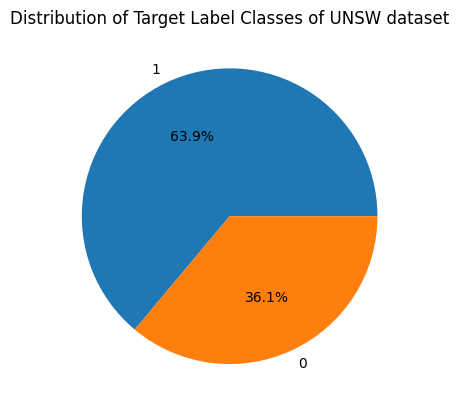

In [6]:
class_counts = df_unsw['label'].value_counts()

plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')

plt.title('Distribution of Target Label Classes of UNSW dataset')

plt.show()

In [7]:
df_unsw = df_unsw.drop(["id", "attack_cat"], axis=1)
df_unsw = df_unsw.dropna()

In [8]:
le=LabelEncoder()
df_unsw['proto'] = le.fit_transform(df_unsw['proto'])
df_unsw['service'] = le.fit_transform(df_unsw['service'])
df_unsw['state'] = le.fit_transform(df_unsw['state'])

In [9]:
class_0 = df_unsw[df_unsw['label'] == 0]
class_1 = df_unsw[df_unsw['label'] == 1]
class_0_downsampled = class_0.sample(n=3500, random_state=42)
class_1_downsampled = class_1.sample(n=3500, random_state=42)
downsampled_df = pd.concat([class_0_downsampled, class_1_downsampled])
downsampled_df = downsampled_df.sample(frac=1, random_state=42)
downsampled_df = downsampled_df.reset_index(drop=True)

In [10]:
scale = MinMaxScaler()
X = downsampled_df[['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports']]

In [11]:
X

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.661949,113,0,4,12,8,2028,716,28.703119,254,...,2,2,1,3,0,0,0,2,3,0
1,0.000000,6,0,5,1,0,46,0,0.000000,0,...,2,2,2,2,0,0,0,2,2,1
2,0.307363,119,0,2,4,4,568,320,22.774374,31,...,3,1,1,4,0,0,0,6,6,0
3,0.593135,113,5,4,10,10,816,1318,32.033180,62,...,1,1,1,3,0,0,1,1,3,0
4,0.434993,113,0,4,10,6,534,268,34.483314,254,...,1,1,1,2,0,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.000002,119,2,5,2,0,114,0,500000.001300,254,...,33,33,17,37,0,0,0,33,37,0
6996,0.000010,80,0,5,2,0,200,0,100000.002500,254,...,2,2,2,4,0,0,0,2,4,0
6997,0.000008,119,2,5,2,0,114,0,125000.000300,254,...,4,4,4,4,0,0,0,4,15,0
6998,0.746207,113,0,4,10,8,2516,354,22.781882,254,...,1,1,1,3,0,0,0,2,3,0


In [12]:
 X_train, X_test, y_train, y_test = train_test_split(X, downsampled_df['label'], test_size=0.3, random_state=42)

# Random Forest

In [13]:
forest = RandomForestClassifier()
start_time = time.time()
forest.fit(X_train, y_train)
end_time = time.time()
execution_time_rfc = end_time - start_time
print("Time taken for training:", execution_time_rfc, "seconds")

Time taken for training: 1.6380767822265625 seconds


In [14]:
y_pred_test = forest.predict(X_test)

In [15]:
 accuracy_rf = accuracy_score(y_test, y_pred_test)
 accuracy_rf

0.9376190476190476

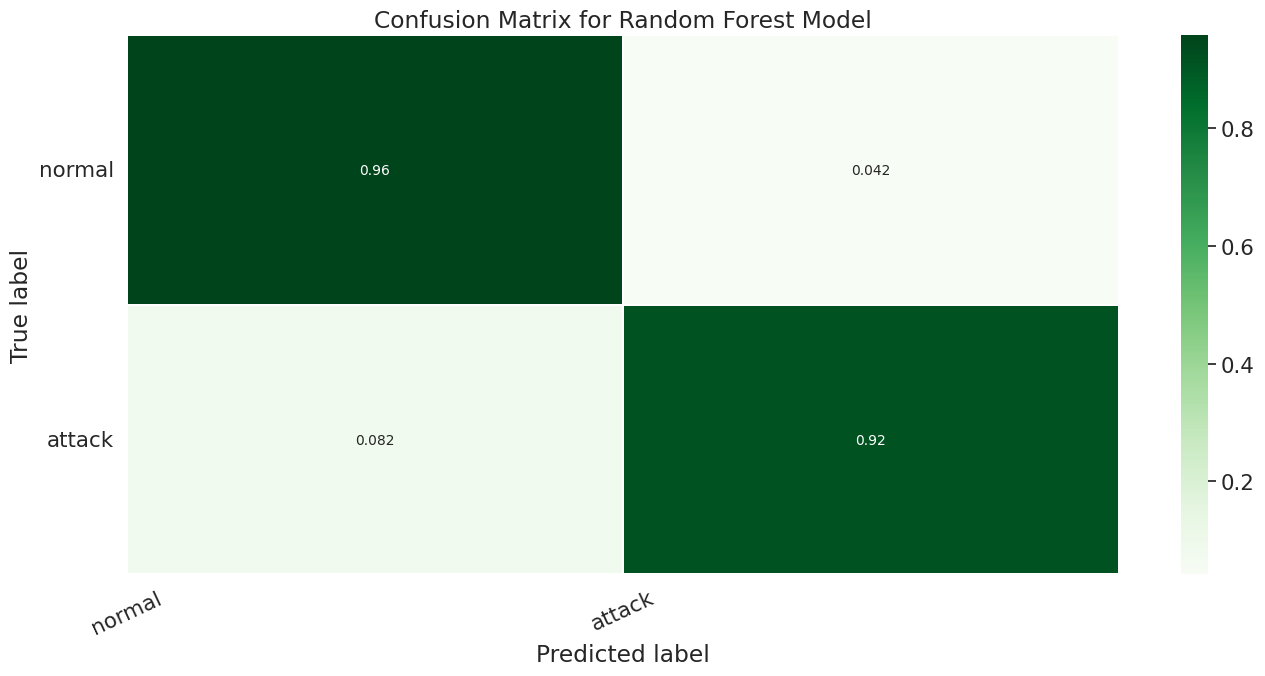

In [16]:
confusion_matrix(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [17]:
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1033
           1       0.96      0.92      0.94      1067

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



# KNN


In [18]:
KNN = KNeighborsClassifier()
start_time = time.time()
KNN.fit(X_train, y_train)
end_time = time.time()
execution_time_knn = end_time - start_time
print("Time taken for training:", execution_time_knn, "seconds")

Time taken for training: 0.011266469955444336 seconds


In [19]:
y_pred_test = KNN.predict(X_test)

In [20]:
accuracy_knn = accuracy_score(y_test, y_pred_test)
accuracy_knn

0.8138095238095238

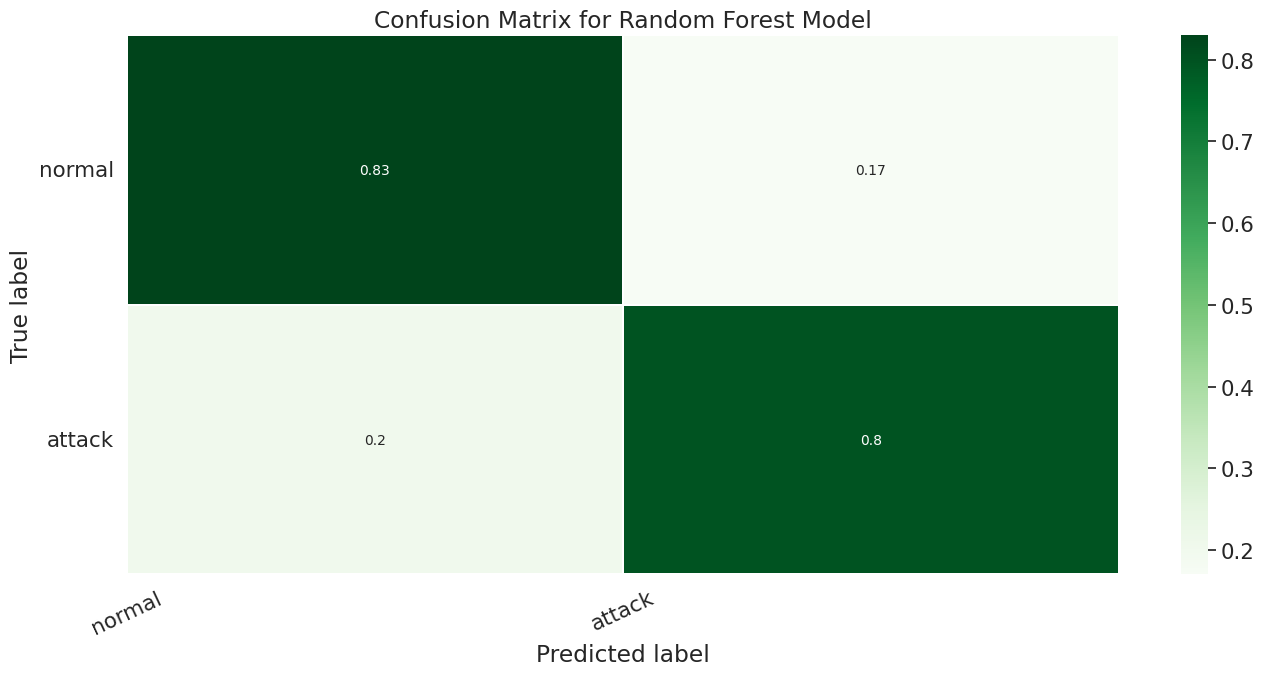

In [21]:
confusion_matrix(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [22]:
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1033
           1       0.83      0.80      0.81      1067

    accuracy                           0.81      2100
   macro avg       0.81      0.81      0.81      2100
weighted avg       0.81      0.81      0.81      2100



# D-TREE 

In [23]:
d_tree = DecisionTreeClassifier()
start_time = time.time()
d_tree.fit(X_train, y_train)
end_time = time.time()
execution_time_dt = end_time - start_time
print("Time taken for training:", execution_time_dt, "seconds")

Time taken for training: 0.11306977272033691 seconds


In [24]:
y_pred_test = d_tree.predict(X_test)

In [25]:
accuracy_dt = accuracy_score(y_test, y_pred_test)
accuracy_dt

0.9142857142857143

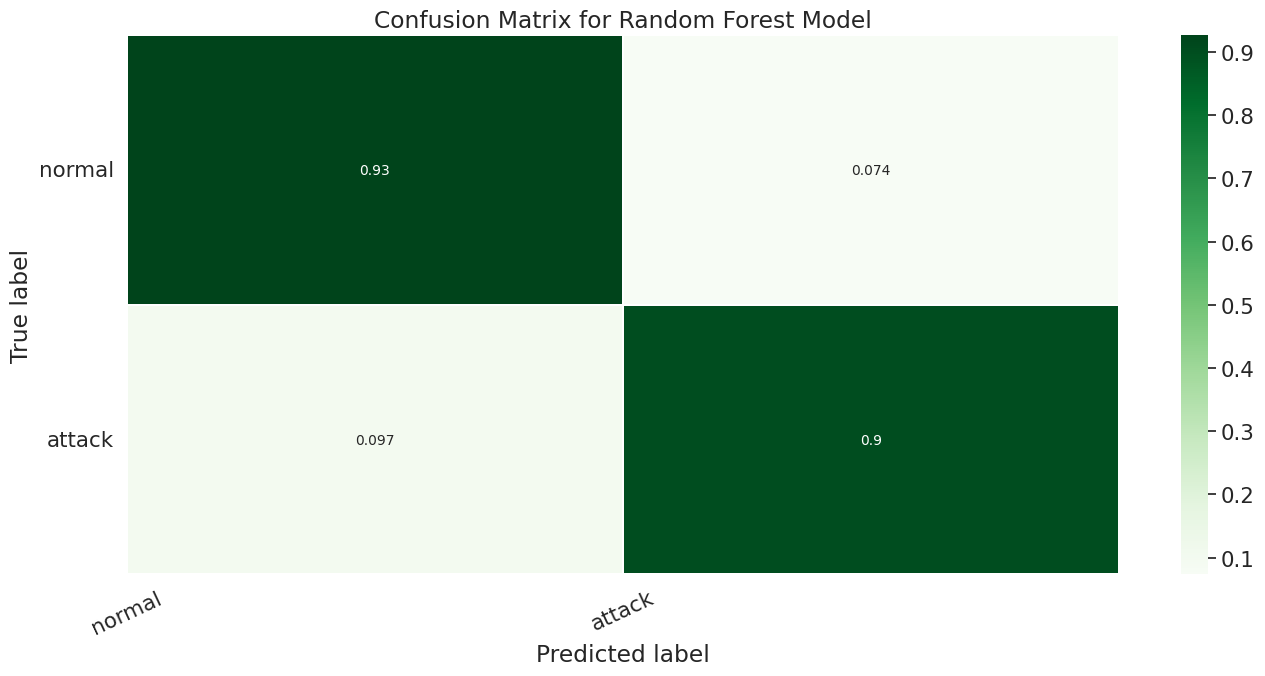

In [26]:
confusion_matrix(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [27]:
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1033
           1       0.93      0.90      0.91      1067

    accuracy                           0.91      2100
   macro avg       0.91      0.91      0.91      2100
weighted avg       0.91      0.91      0.91      2100



# MultinomialNB

In [28]:
MB = MultinomialNB()
start_time = time.time()
MB.fit(X_train, y_train)
end_time = time.time()
execution_time_mb = end_time - start_time
print("Time taken for training:", execution_time_mb, "seconds")

Time taken for training: 0.026966333389282227 seconds


In [29]:
y_pred_test = MB.predict(X_test)

In [30]:
accuracy_mb = accuracy_score(y_test, y_pred_test)
accuracy_mb

0.7966666666666666

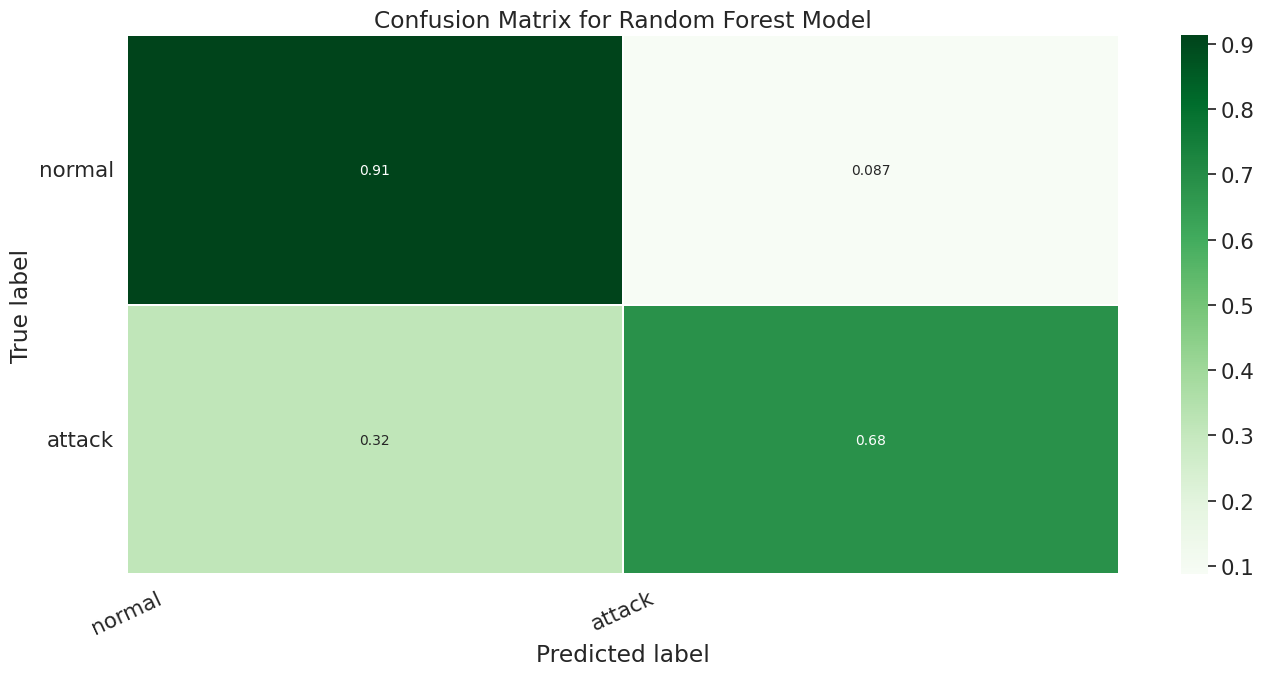

In [31]:
confusion_matrix(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [32]:
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.74      0.91      0.82      1033
           1       0.89      0.68      0.77      1067

    accuracy                           0.80      2100
   macro avg       0.81      0.80      0.79      2100
weighted avg       0.81      0.80      0.79      2100



# Logistic


In [33]:
lr = LogisticRegression()
start_time = time.time()
lr.fit(X_train, y_train)
end_time = time.time()
execution_time_lr = end_time - start_time
print("Time taken for training:", execution_time_lr, "seconds")

Time taken for training: 0.21725893020629883 seconds


In [34]:
y_pred_test = lr.predict(X_test)

In [35]:
accuracy_lr = accuracy_score(y_test, y_pred_test)
accuracy_lr

0.8061904761904762

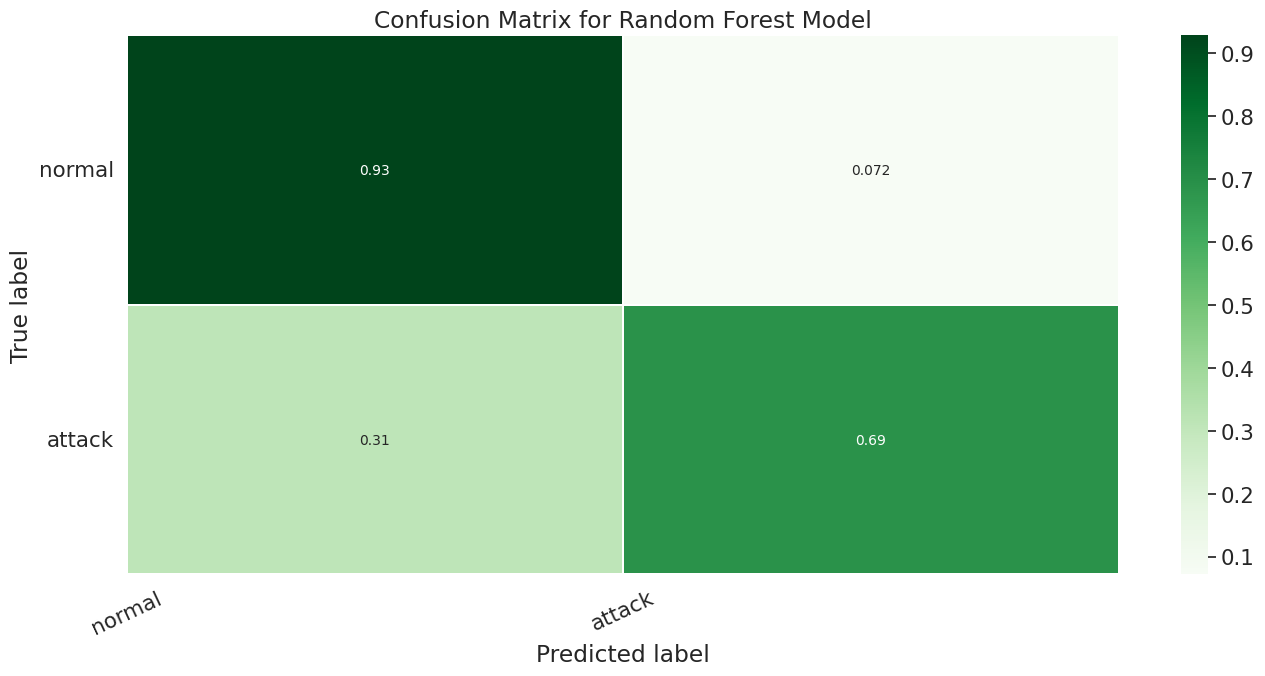

In [36]:
confusion_matrix(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [37]:
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.74      0.93      0.82      1033
           1       0.91      0.69      0.78      1067

    accuracy                           0.81      2100
   macro avg       0.83      0.81      0.80      2100
weighted avg       0.83      0.81      0.80      2100



# SVM (Linear)

In [38]:
start_time = time.time()
SVMLN = LinearSVC().fit(X_train, y_train)
end_time = time.time()
execution_time_svmln = end_time - start_time
print("Time taken for training:", execution_time_svmln, "seconds")

Time taken for training: 3.545156478881836 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [39]:
svclin_pred = SVMLN.predict(X_test)

In [40]:
accuracy_lin = accuracy_score(y_test, svclin_pred)
accuracy_lin

0.6914285714285714

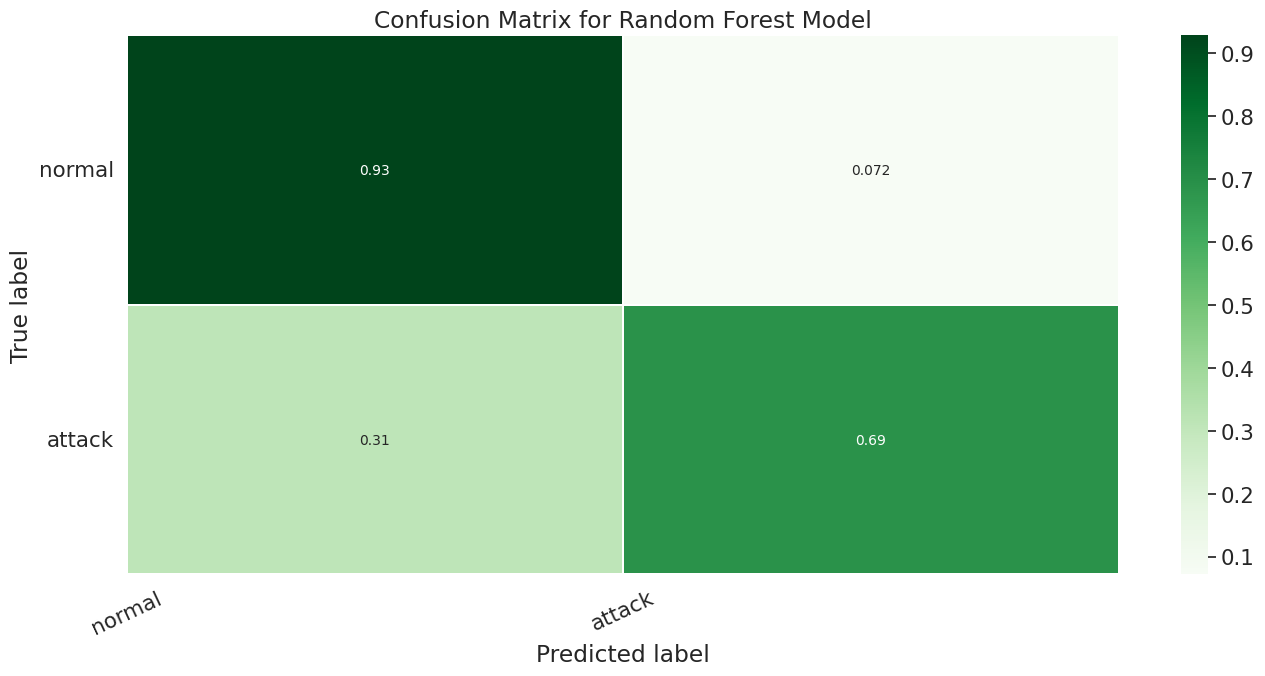

In [41]:
confusion_matrix(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [42]:
print("\033[1m" + "Classification report :" + "\033[0m")
print(classification_report(y_test, svclin_pred))

Classification report :
              precision    recall  f1-score   support

           0       0.62      0.95      0.75      1033
           1       0.90      0.44      0.59      1067

    accuracy                           0.69      2100
   macro avg       0.76      0.70      0.67      2100
weighted avg       0.76      0.69      0.67      2100



# SVM (RBF)

In [43]:
start_time = time.time()
SVMRBF = LinearSVC().fit(X_train, y_train)
end_time = time.time()
execution_time_rbf = end_time - start_time
print("Time taken for training:", execution_time_rbf, "seconds")

Time taken for training: 1.2309601306915283 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [44]:
svc_pred = SVMRBF.predict(X_test)

In [45]:
accuracy_rbf = accuracy_score(y_test, svc_pred)
accuracy_rbf

0.5085714285714286

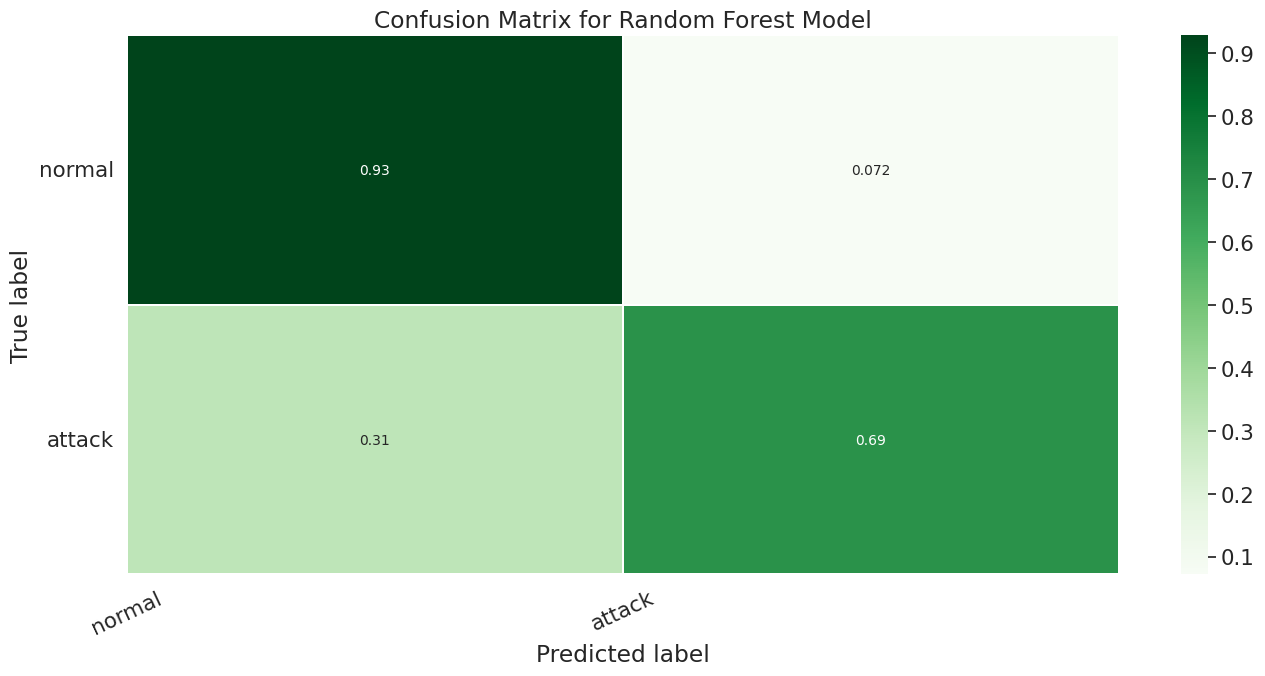

In [46]:
confusion_matrix(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [47]:
print("\033[1m" + "Classification report :" + "\033[0m")
print(classification_report(y_test, svc_pred))

Classification report :
              precision    recall  f1-score   support

           0       0.50      0.84      0.63      1033
           1       0.55      0.18      0.28      1067

    accuracy                           0.51      2100
   macro avg       0.52      0.51      0.45      2100
weighted avg       0.52      0.51      0.45      2100



#Comparison

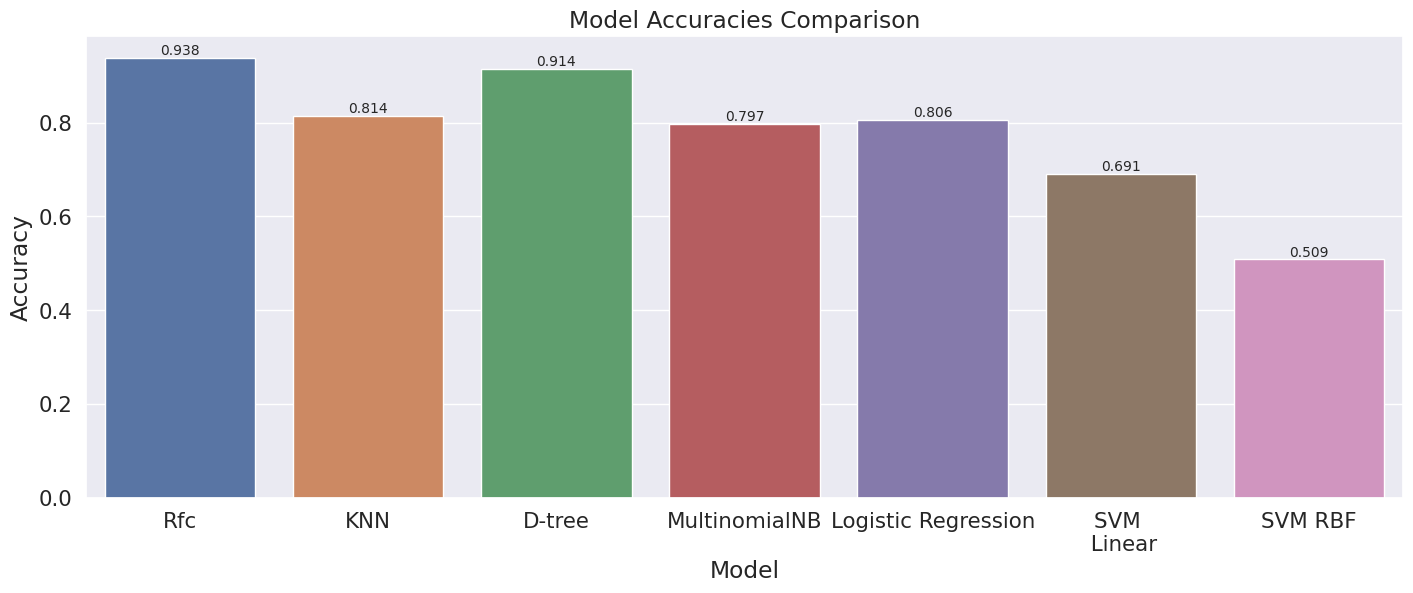

In [48]:
model_names = ['Rfc', 'KNN', 'D-tree', 'MultinomialNB', 'Logistic Regression', 'SVM \n Linear', 'SVM RBF']
accuracies = [accuracy_rf, accuracy_knn, accuracy_dt, accuracy_mb, accuracy_lr, accuracy_lin, accuracy_rbf]

plt.figure(figsize=(17, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()


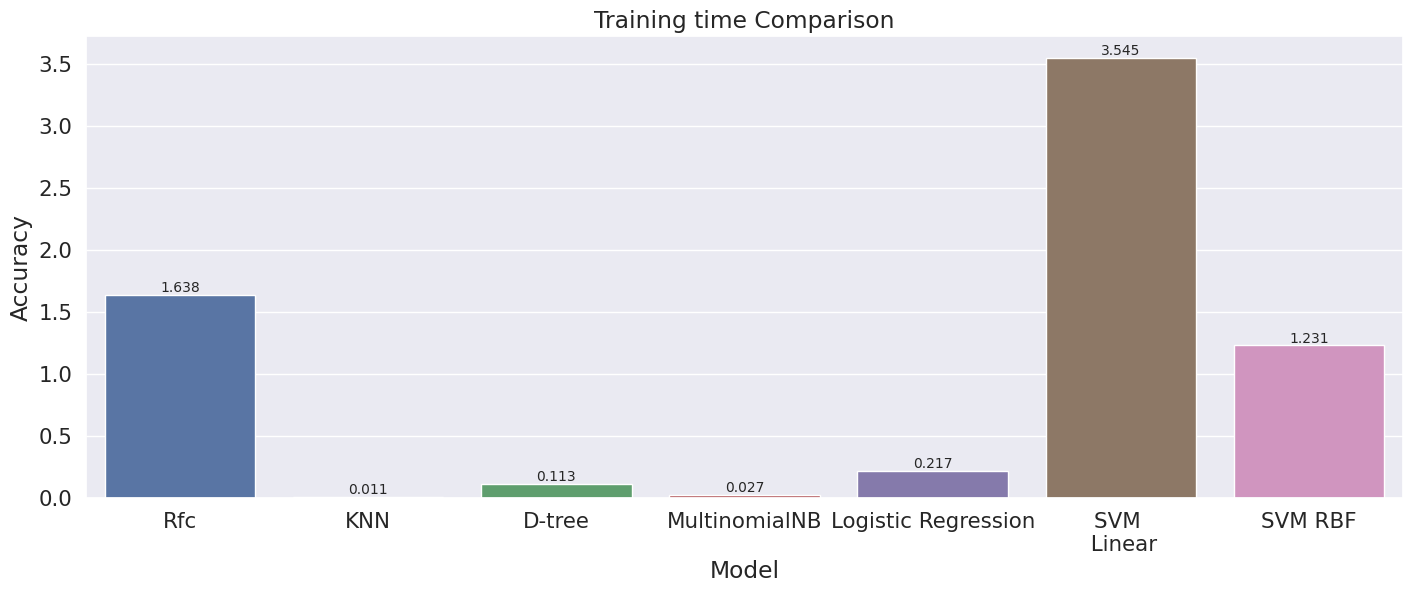

In [49]:
model_names = ['Rfc', 'KNN', 'D-tree', 'MultinomialNB', 'Logistic Regression', 'SVM \n Linear', 'SVM RBF']
accuracies = [execution_time_rfc, execution_time_knn, execution_time_dt, execution_time_mb, execution_time_lr, execution_time_svmln, execution_time_rbf]

plt.figure(figsize=(17, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training time Comparison')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()


#Feature selection using "zoofs"



In [50]:
!pip install zoofs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for zoofs: filename=zoofs-0.1.26-py3-none-any.whl size=23602 sha256=473ef10dbe57ee03834ff9d41e6cc23e2163a0f7ac583b18d984fefff9352b36
  Stored in directory: /root/.cache/pip/wheels/c5/47/90/d0547288297679ffb3e38d6d5b700dab7bc0314cf677051b77
Successfully built zoofs


In [51]:
# X_train = pd.DataFrame(X_train)
# X_test = pd.DataFrame(X_test)


##Particle Swarm Optimization

In [76]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
def objective_function_topass(model,X_train, y_train, X_valid, y_valid):      
    model.fit(X_train,y_train)  
    y_pred = model.predict(X_valid)
    accuracy=accuracy_score(y_valid, y_pred)
    return accuracy

# import an algorithm !  
from zoofs import ParticleSwarmOptimization
# create object of algorithm
PSO=ParticleSwarmOptimization(objective_function_topass,n_iteration=10,
                                       population_size=20,minimize=False,c1=2,c2=2,w=0.9)



SVMRBF = SVC()
start_time = time.time()
selected_PSO = PSO.fit(SVMRBF, X_train, y_train, X_test, y_test,verbose=True)
end_time = time.time()
execution_time_pso = end_time - start_time
print("Time taken for training:", execution_time_pso, "seconds")
PSO.plot_history()

 [ 2023-05-23 18:59:30,955 ] Finished iteration #0 with objective value 0.7938095238095239. Current best value is 0.7938095238095239 
 [ 2023-05-23 19:00:09,514 ] Finished iteration #1 with objective value 0.7942857142857143. Current best value is 0.7942857142857143 
 [ 2023-05-23 19:00:46,670 ] Finished iteration #2 with objective value 0.7942857142857143. Current best value is 0.7942857142857143 
 [ 2023-05-23 19:01:19,350 ] Finished iteration #3 with objective value 0.7942857142857143. Current best value is 0.7942857142857143 
 [ 2023-05-23 19:01:50,632 ] Finished iteration #4 with objective value 0.7942857142857143. Current best value is 0.7942857142857143 
 [ 2023-05-23 19:02:27,189 ] Finished iteration #5 with objective value 0.7942857142857143. Current best value is 0.7942857142857143 
 [ 2023-05-23 19:02:59,219 ] Finished iteration #6 with objective value 0.7952380952380952. Current best value is 0.7952380952380952 
 [ 2023-05-23 19:03:30,967 ] Finished iteration #7 with object

Time taken for training: 350.06883692741394 seconds


In [77]:
selected_PSO

['proto',
 'state',
 'spkts',
 'sbytes',
 'rate',
 'sttl',
 'dloss',
 'djit',
 'swin',
 'synack',
 'ackdat',
 'smean',
 'ct_state_ttl',
 'ct_src_dport_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [78]:
X_train_selected = X_train[selected_PSO]
X_test_selected = X_test[selected_PSO]


### Random Forest part

In [93]:
forest1 = RandomForestClassifier()
start_time = time.time()
forest1.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_rfpso = end_time - start_time
print("Time taken for training:", execution_time_rfpso, "seconds")

Time taken for training: 1.1702041625976562 seconds


In [94]:
y_pred = forest1.predict(X_test_selected)
accuracy_rf = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_rf)

Accuracy: 0.929047619047619


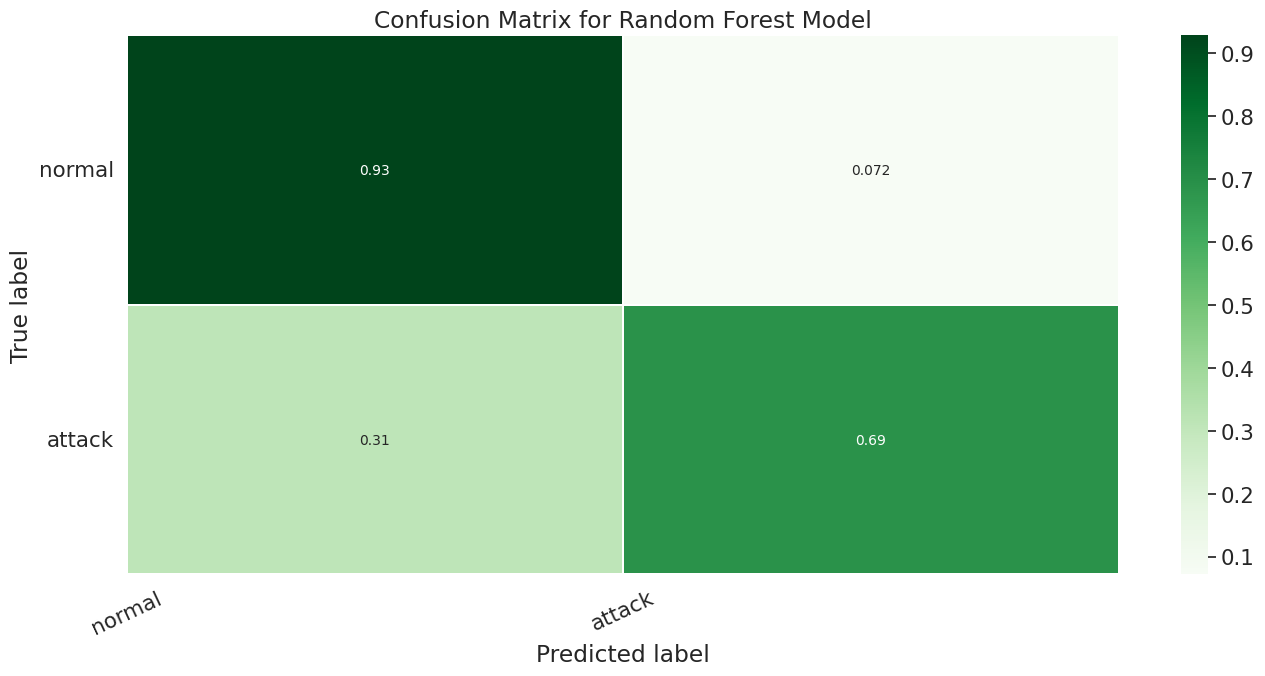

In [95]:
confusion_matrix(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [96]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1033
           1       0.95      0.91      0.93      1067

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



### Descision Tree

In [83]:
d_tree1 = DecisionTreeClassifier()
start_time = time.time()
d_tree1.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_dtpso = end_time - start_time
print("Time taken for training:", execution_time_dtpso, "seconds")

Time taken for training: 0.031128644943237305 seconds


In [84]:
y_pred = d_tree1.predict(X_test_selected)
accuracy_dt = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_dt)

Accuracy: 0.9128571428571428


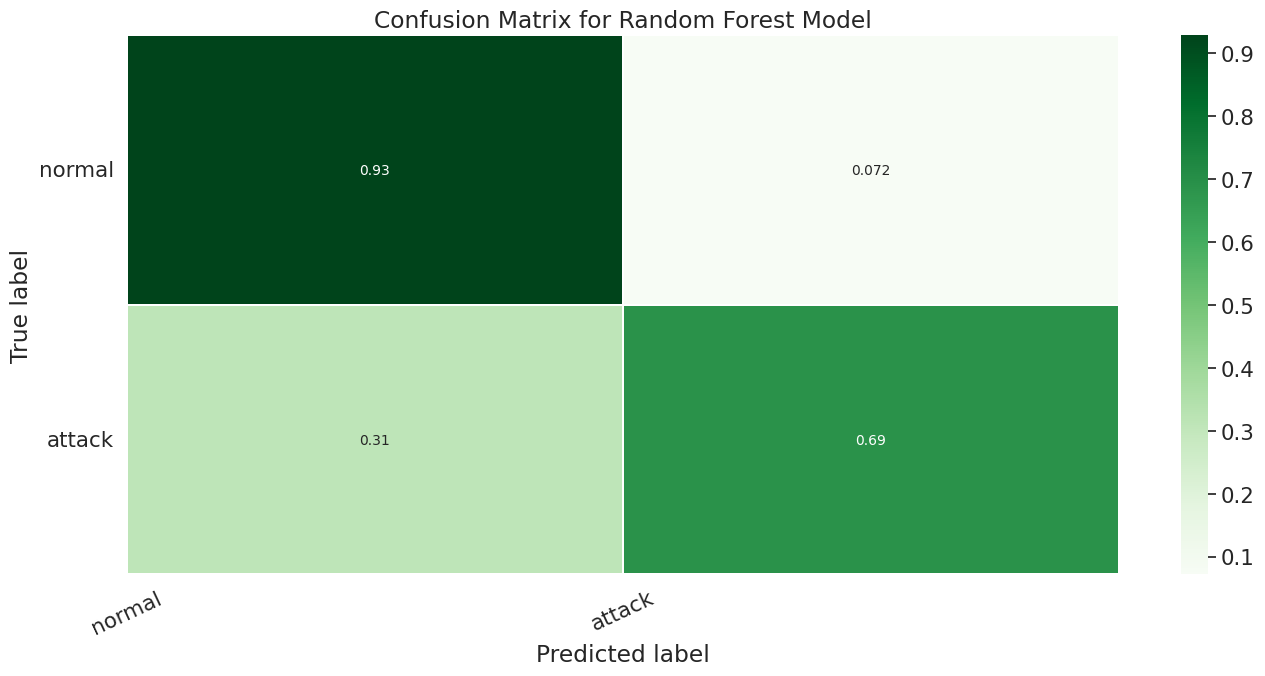

In [85]:
confusion_matrix(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [86]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1033
           1       0.93      0.90      0.91      1067

    accuracy                           0.91      2100
   macro avg       0.91      0.91      0.91      2100
weighted avg       0.91      0.91      0.91      2100



###KNN part

In [87]:
KNN1 = KNeighborsClassifier()
start_time = time.time()
KNN1.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_knnpso = end_time - start_time
print("Time taken for training:", execution_time_knnpso, "seconds")

Time taken for training: 0.005176067352294922 seconds


In [88]:
y_pred = KNN1.predict(X_test_selected)
accurac_knn = accuracy_score(y_test, y_pred)

print('Accuracy:', accurac_knn)

Accuracy: 0.8933333333333333


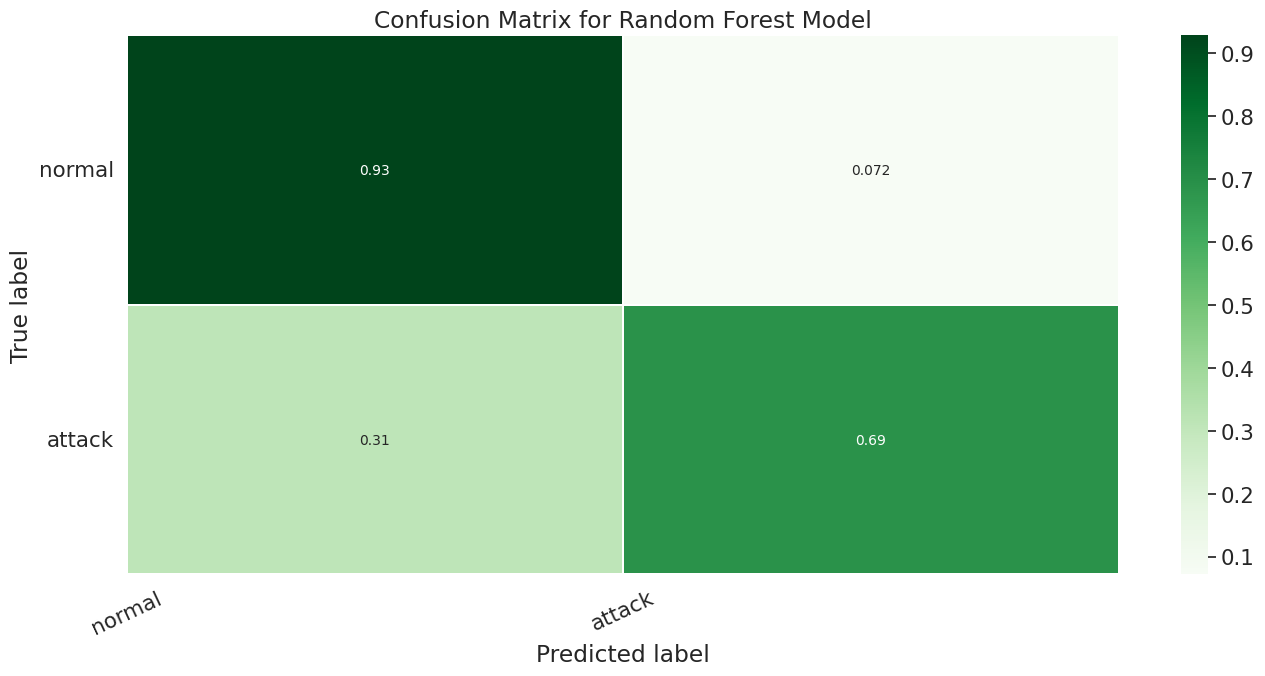

In [89]:
confusion_matrix(y_test, y_pred_test)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [90]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1033
           1       0.91      0.88      0.89      1067

    accuracy                           0.89      2100
   macro avg       0.89      0.89      0.89      2100
weighted avg       0.89      0.89      0.89      2100



###Comparison

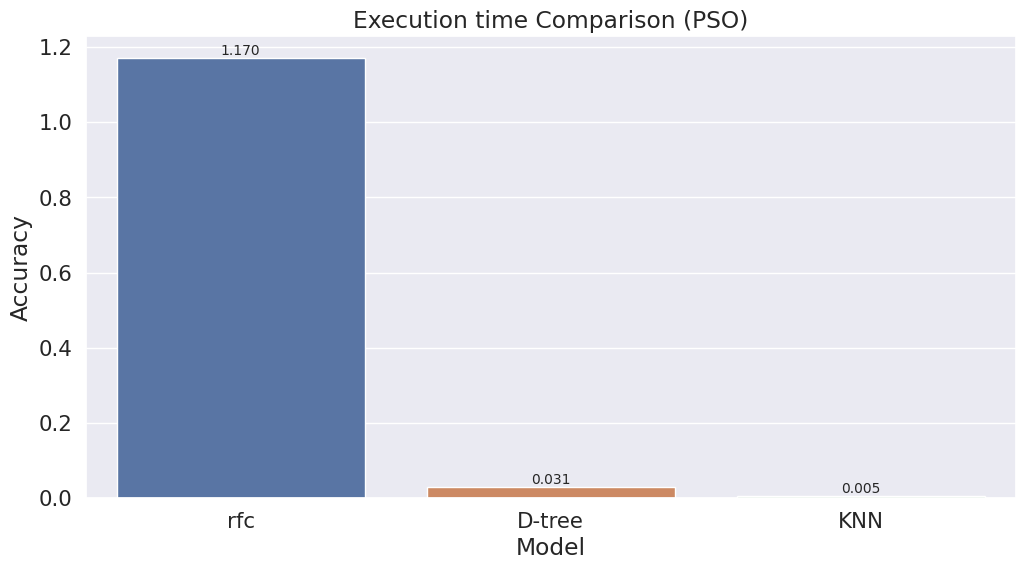

In [97]:
model_names = [ 'rfc', 'D-tree', 'KNN']
accuracies = [ execution_time_rfpso, execution_time_dtpso, execution_time_knnpso]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Execution time Comparison (PSO)')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()


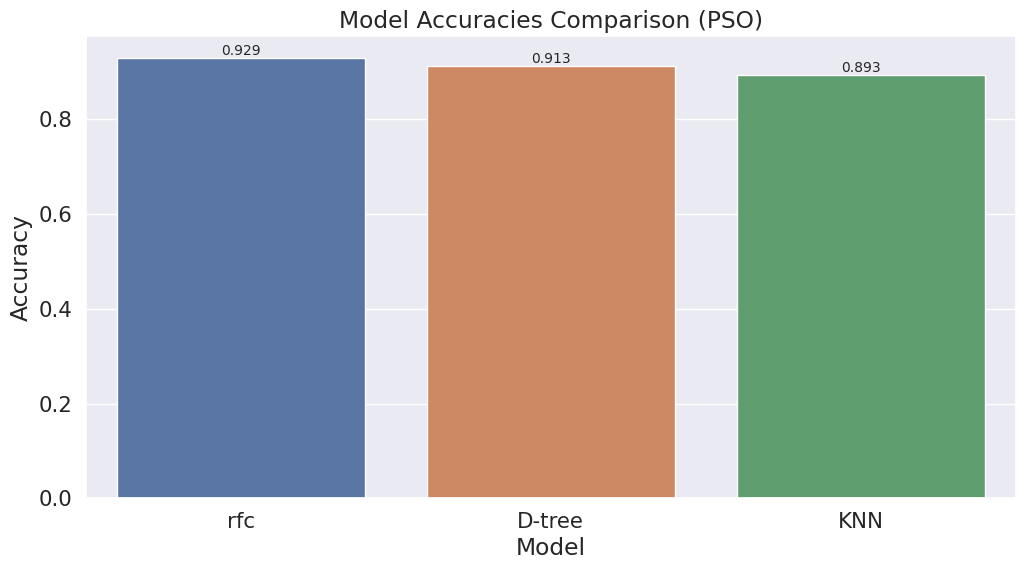

In [98]:
model_names = ['rfc', 'D-tree', 'KNN']
accuracies = [accuracy_rf, accuracy_dt, accurac_knn]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison (PSO)')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()


## Grey Wolf Algorithm

In [63]:
from sklearn.metrics import log_loss
def objective_function_topass(model,X_train, y_train, X_valid, y_valid):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    accuracy=accuracy_score(y_valid, y_pred)
    return accuracy

# import an algorithm !  
from zoofs import GreyWolfOptimization
# create object of algorithm
GWO=GreyWolfOptimization(objective_function_topass,n_iteration=10,method=1,
                                    population_size=20,minimize=False)

SVMRBF = SVC()
start_time = time.time()
selected_wolf = GWO.fit(SVMRBF, X_train, y_train, X_test, y_test,verbose=True)
end_time = time.time()
execution_time_gwo = end_time - start_time
print("Time taken for training:", execution_time_gwo, "seconds")
GWO.plot_history()

 [ 2023-05-23 16:16:33,752 ] Finished iteration #0 with objective value 0.7852380952380953. Current best value is 0.7852380952380953 
 [ 2023-05-23 16:17:47,137 ] Finished iteration #1 with objective value 0.7842857142857143. Current best value is 0.7852380952380953 
 [ 2023-05-23 16:18:35,005 ] Finished iteration #2 with objective value 0.7842857142857143. Current best value is 0.7852380952380953 
 [ 2023-05-23 16:19:17,303 ] Finished iteration #3 with objective value 0.7842857142857143. Current best value is 0.7852380952380953 
 [ 2023-05-23 16:19:57,705 ] Finished iteration #4 with objective value 0.7842857142857143. Current best value is 0.7852380952380953 
 [ 2023-05-23 16:20:38,477 ] Finished iteration #5 with objective value 0.7842857142857143. Current best value is 0.7852380952380953 
 [ 2023-05-23 16:21:19,091 ] Finished iteration #6 with objective value 0.7942857142857143. Current best value is 0.7942857142857143 
 [ 2023-05-23 16:21:57,227 ] Finished iteration #7 with object

Time taken for training: 493.5708498954773 seconds


In [64]:
selected_wolf

['dur',
 'proto',
 'service',
 'state',
 'spkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'sloss',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'dwin',
 'synack',
 'smean',
 'dmean',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [65]:
X_train_selected = X_train[selected_wolf]
X_test_selected = X_test[selected_wolf]


### SVM part

In [66]:
start_time = time.time()
SVM2 = LinearSVC().fit(X_train_selected, y_train)
end_time = time.time()
execution_time_svmpso = end_time - start_time
print("Time taken for training:", execution_time_svmpso, "seconds")

Time taken for training: 0.6469724178314209 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [67]:
y_pred1 = SVM2.predict(X_test_selected)
accuracy_svm = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy_svm)

Accuracy: 0.5904761904761905


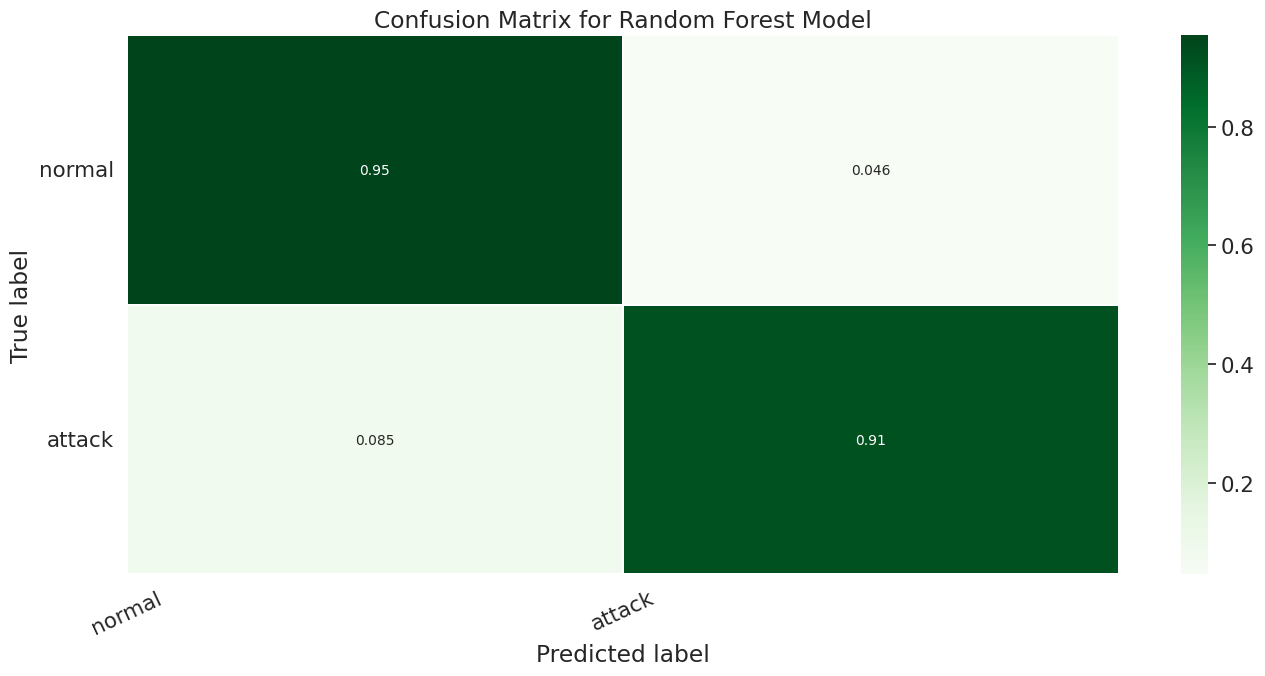

In [68]:
confusion_matrix(y_test, y_pred1)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [69]:
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.55      0.85      0.67      1033
           1       0.70      0.34      0.46      1067

    accuracy                           0.59      2100
   macro avg       0.63      0.59      0.56      2100
weighted avg       0.63      0.59      0.56      2100



### Random Forest

In [70]:
forest2 = RandomForestClassifier()
start_time = time.time()
forest2.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_rfpso = end_time - start_time
print("Time taken for training:", execution_time_rfpso, "seconds")

Time taken for training: 0.6892821788787842 seconds


In [71]:
y_pred1 = forest2.predict(X_test_selected)
accuracy_rf = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy_rf)

Accuracy: 0.9333333333333333


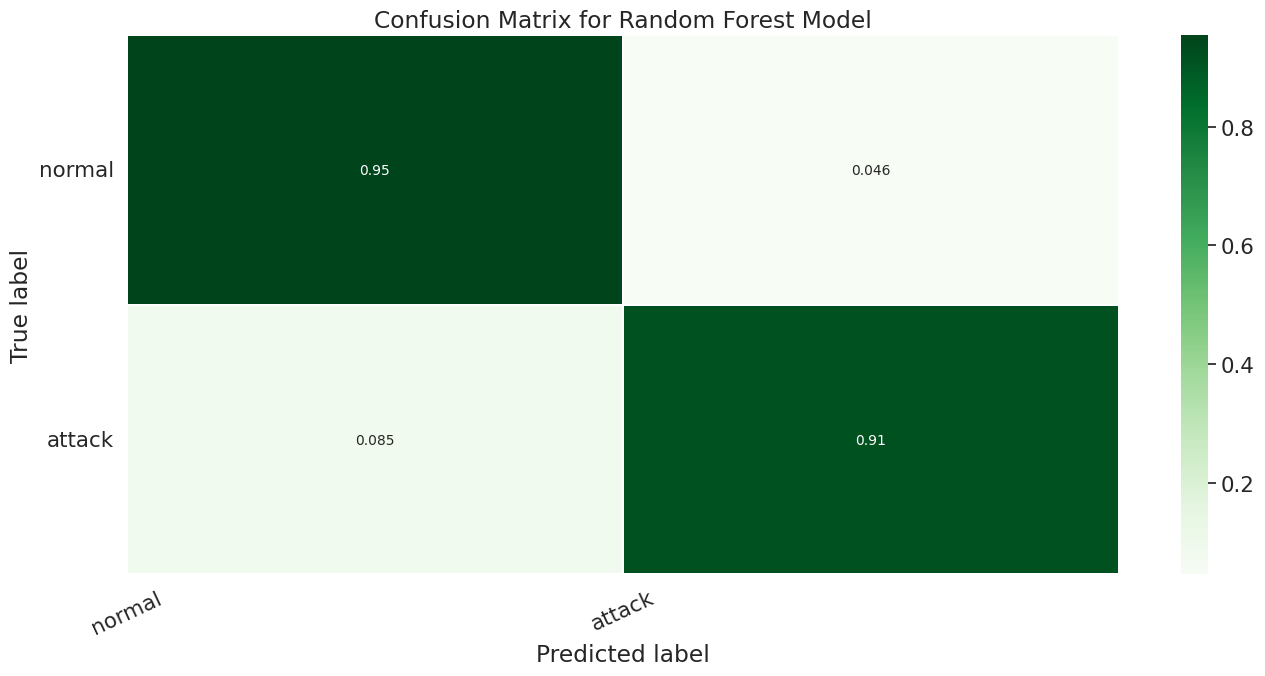

In [72]:
confusion_matrix(y_test, y_pred1)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [73]:
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1033
           1       0.95      0.91      0.93      1067

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



### Descision Tree

In [74]:
d_tree2 = DecisionTreeClassifier()
start_time = time.time()
d_tree2.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_dtpso = end_time - start_time
print("Time taken for training:", execution_time_dtpso, "seconds")

Time taken for training: 0.054921865463256836 seconds


In [75]:
y_pred1 = d_tree2.predict(X_test_selected)
accuracy_dt = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy_dt)

Accuracy: 0.9128571428571428


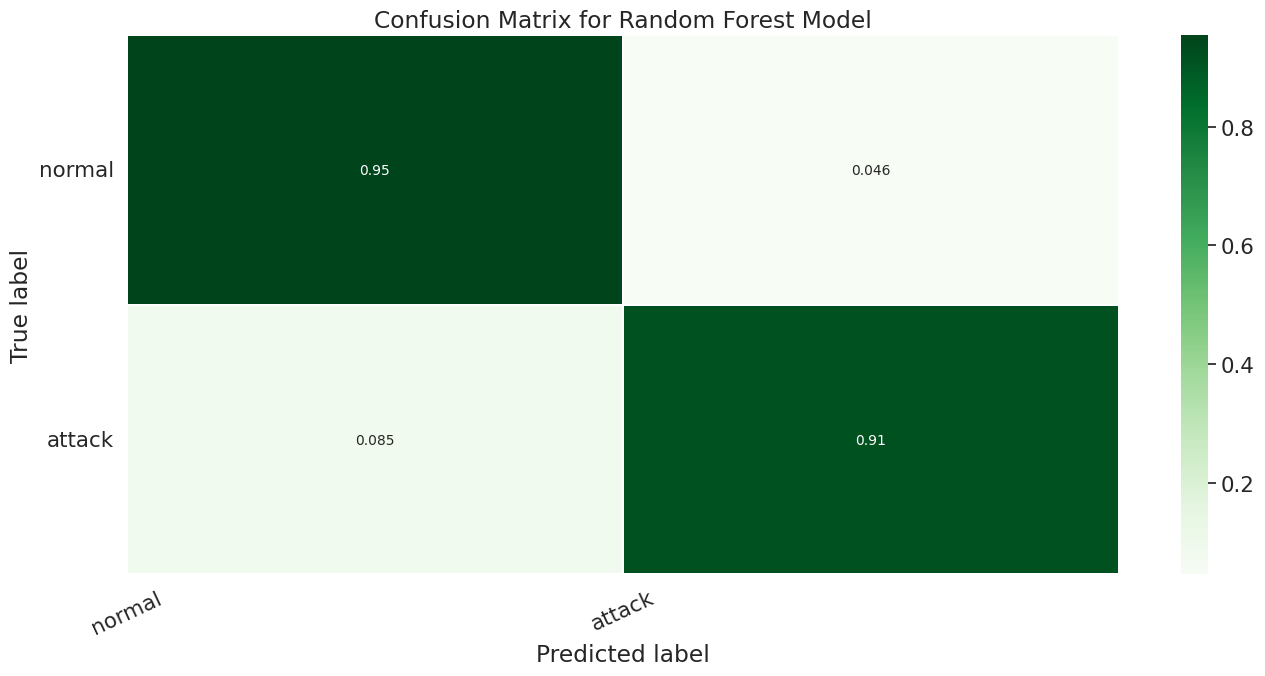

In [76]:
confusion_matrix(y_test, y_pred1)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [77]:
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1033
           1       0.92      0.91      0.91      1067

    accuracy                           0.91      2100
   macro avg       0.91      0.91      0.91      2100
weighted avg       0.91      0.91      0.91      2100



###KNN part

In [78]:
KNN2 = KNeighborsClassifier()
start_time = time.time()
KNN2.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_knnpso = end_time - start_time
print("Time taken for training:", execution_time_knnpso, "seconds")

Time taken for training: 0.005441427230834961 seconds


In [79]:
y_pred1 = KNN2.predict(X_test_selected)
accurac_knn = accuracy_score(y_test, y_pred1)

print('Accuracy:', accurac_knn)

Accuracy: 0.8509523809523809


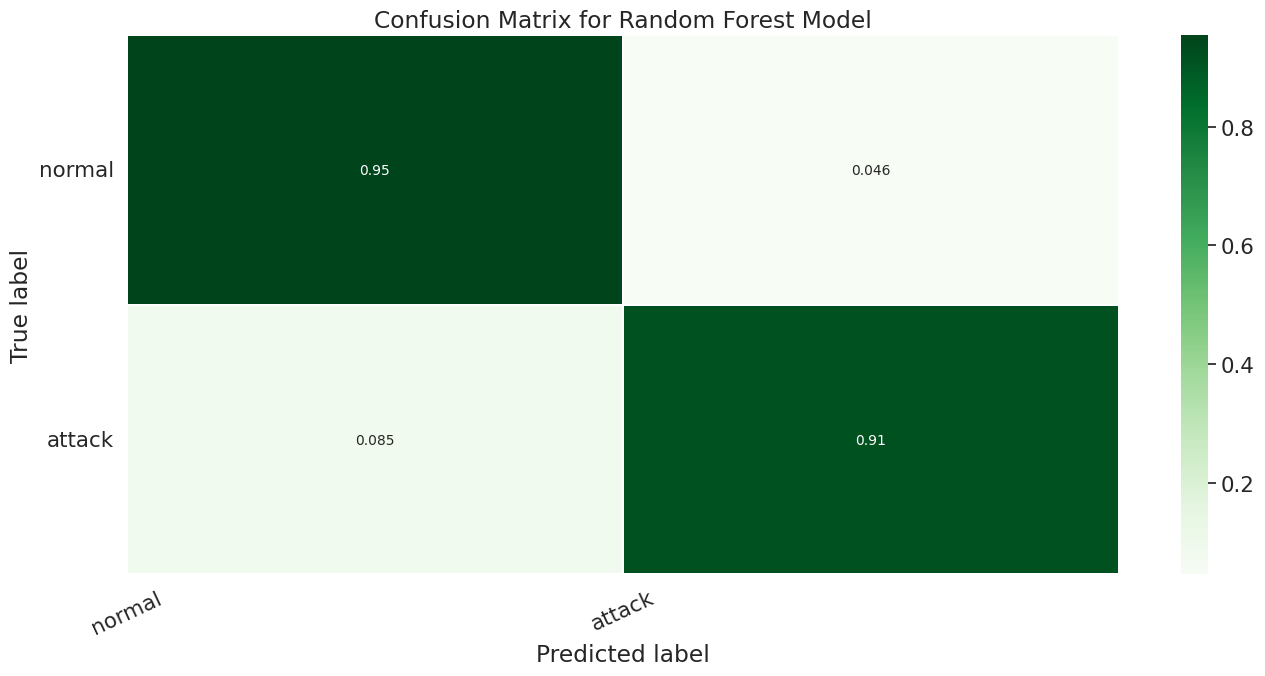

In [80]:
confusion_matrix(y_test, y_pred1)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [81]:
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.87      0.83      0.85      1067

    accuracy                           0.85      2100
   macro avg       0.85      0.85      0.85      2100
weighted avg       0.85      0.85      0.85      2100



###Comparison

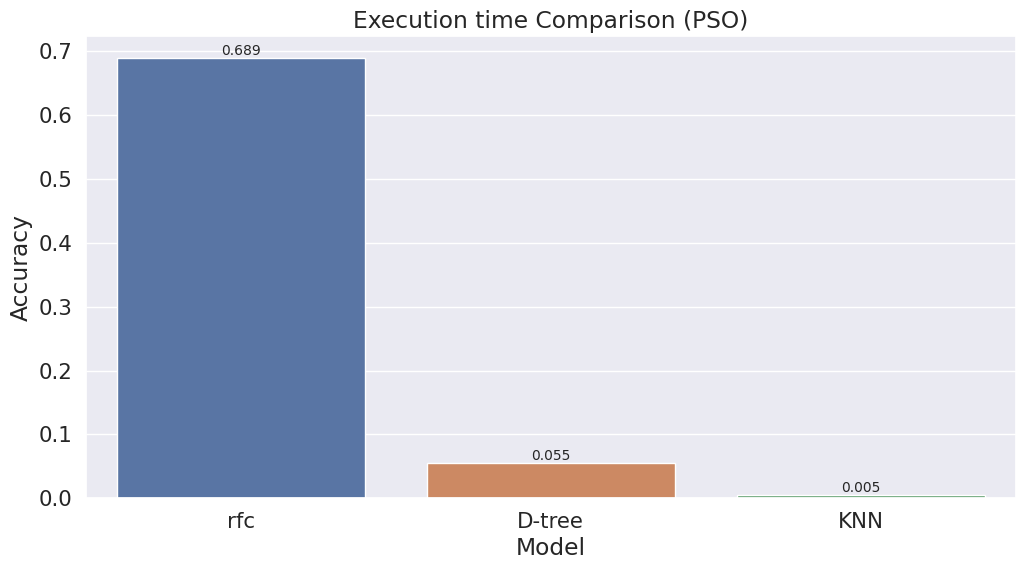

In [85]:
model_names = [ 'rfc', 'D-tree', 'KNN']
accuracies = [execution_time_rfpso, execution_time_dtpso, execution_time_knnpso]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Execution time Comparison (PSO)')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()


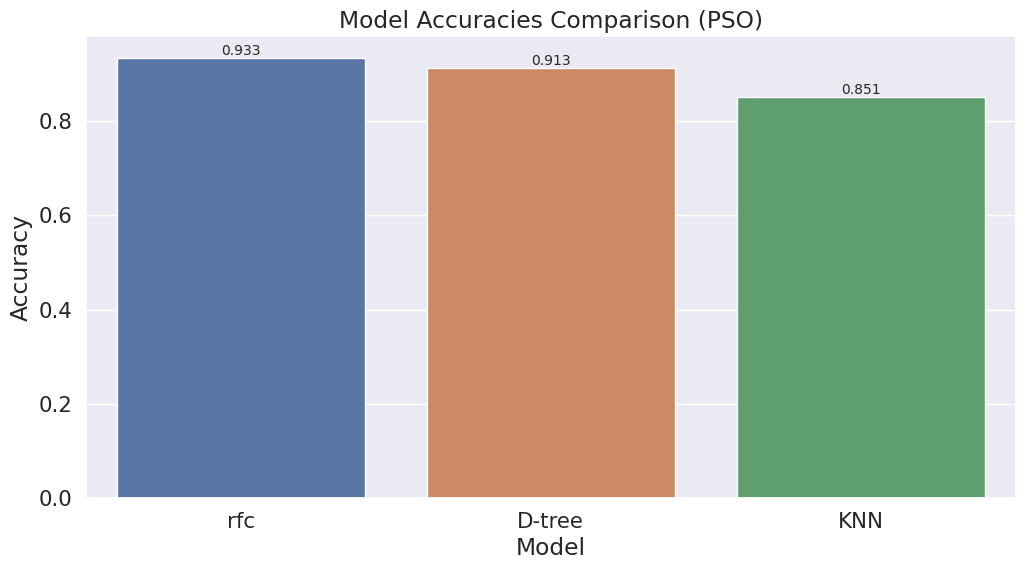

In [86]:
model_names = ['rfc', 'D-tree', 'KNN']
accuracies = [ accuracy_rf, accuracy_dt, accurac_knn]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison (PSO)')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()


## Harris Hawk Optimization

In [87]:
from sklearn.metrics import log_loss
def objective_function_topass(model,X_train, y_train, X_valid, y_valid):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    accuracy=accuracy_score(y_valid, y_pred)
    return accuracy

# import an algorithm !  
from zoofs import HarrisHawkOptimization
# create object of algorithm
HHO=HarrisHawkOptimization(objective_function_topass,n_iteration=10,
                                       population_size=20,minimize=False)
SVMRBF = SVC()
start_time = time.time()
selected_hawk = HHO.fit(SVMRBF, X_train, y_train, X_test, y_test,verbose=True)
end_time = time.time()
execution_time_HHO = end_time - start_time
print("Time taken for training:", execution_time_HHO, "seconds")
HHO.plot_history()

 [ 2023-05-23 16:25:33,520 ] Finished iteration #0 with objective value 0.7842857142857143. Current best value is 0.7842857142857143 
 [ 2023-05-23 16:26:26,595 ] Finished iteration #1 with objective value 0.7842857142857143. Current best value is 0.7842857142857143 
 [ 2023-05-23 16:27:22,675 ] Finished iteration #2 with objective value 0.7842857142857143. Current best value is 0.7842857142857143 
 [ 2023-05-23 16:28:06,997 ] Finished iteration #3 with objective value 0.7842857142857143. Current best value is 0.7842857142857143 
 [ 2023-05-23 16:29:29,466 ] Finished iteration #4 with objective value 0.7842857142857143. Current best value is 0.7842857142857143 
 [ 2023-05-23 16:30:29,074 ] Finished iteration #5 with objective value 0.7842857142857143. Current best value is 0.7842857142857143 
 [ 2023-05-23 16:31:27,627 ] Finished iteration #6 with objective value 0.7842857142857143. Current best value is 0.7842857142857143 
 [ 2023-05-23 16:32:33,563 ] Finished iteration #7 with object

Time taken for training: 649.3217191696167 seconds


In [88]:
selected_hawk

['proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'rate',
 'sttl',
 'dttl',
 'dload',
 'sloss',
 'dloss',
 'sjit',
 'djit',
 'tcprtt',
 'ackdat',
 'smean',
 'trans_depth',
 'response_body_len',
 'ct_state_ttl',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [89]:
X_train_selected = X_train[selected_hawk]
X_test_selected = X_test[selected_hawk]


### Random Forest

In [90]:
forest3 = RandomForestClassifier()
start_time = time.time()
forest3.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_rfpso = end_time - start_time
print("Time taken for training:", execution_time_rfpso, "seconds")

Time taken for training: 0.6401224136352539 seconds


In [91]:
y_pred2 = forest3.predict(X_test_selected)
accuracy_rf = accuracy_score(y_test, y_pred2)
print('Accuracy:', accuracy_rf)

Accuracy: 0.9342857142857143


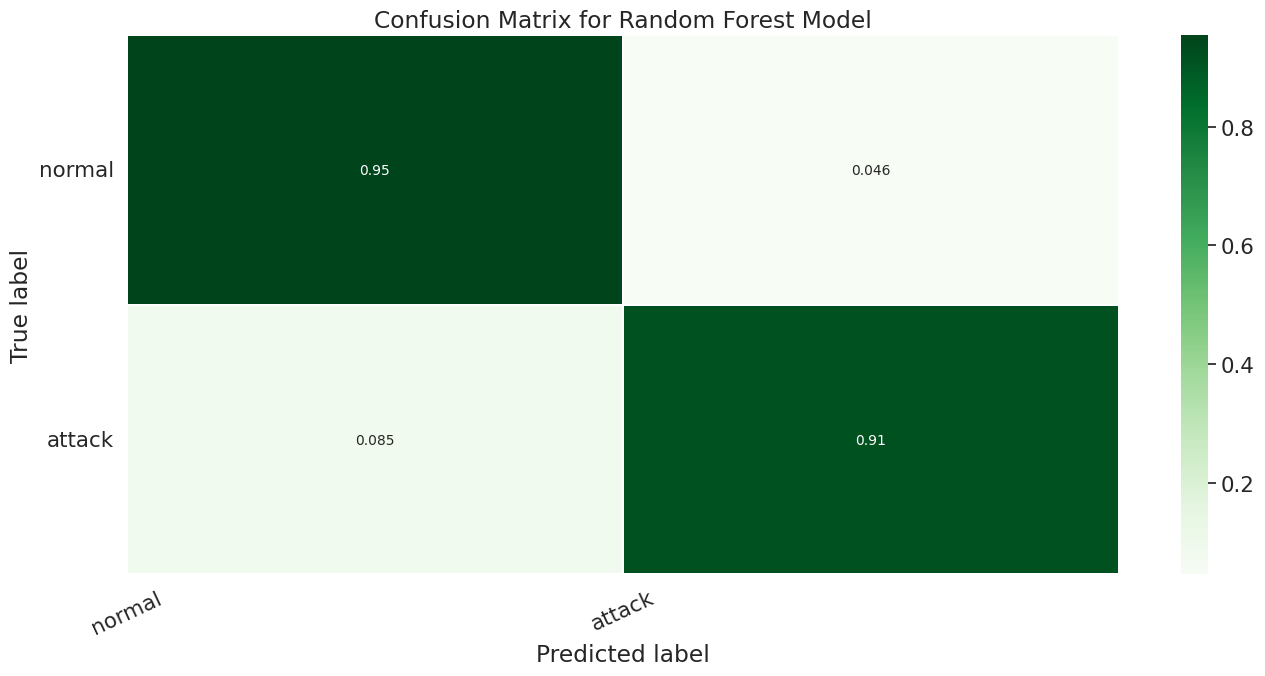

In [92]:
confusion_matrix(y_test, y_pred2)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [93]:
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1033
           1       0.96      0.91      0.93      1067

    accuracy                           0.93      2100
   macro avg       0.94      0.93      0.93      2100
weighted avg       0.94      0.93      0.93      2100



### Descision Tree

In [94]:
d_tree3 = DecisionTreeClassifier()
start_time = time.time()
d_tree3.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_dtpso = end_time - start_time
print("Time taken for training:", execution_time_dtpso, "seconds")

Time taken for training: 0.03746509552001953 seconds


In [95]:
y_pred2 = d_tree3.predict(X_test_selected)
accuracy_dt = accuracy_score(y_test, y_pred2)
print('Accuracy:', accuracy_dt)

Accuracy: 0.9133333333333333


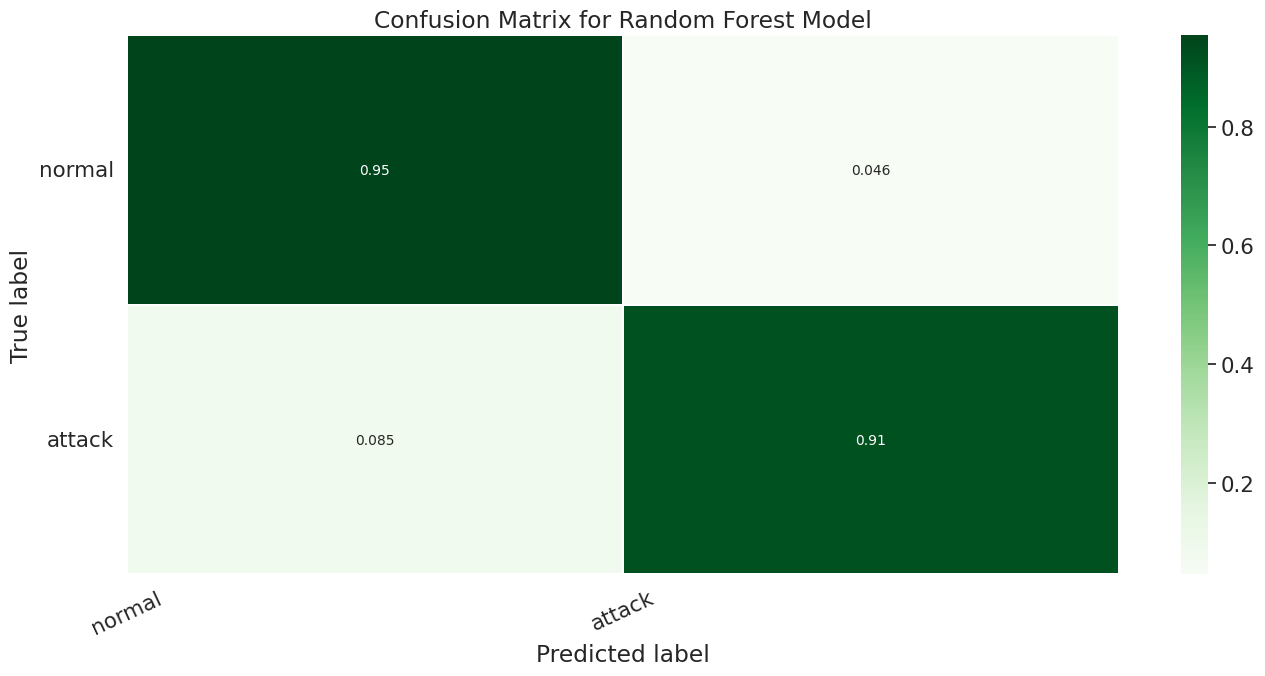

In [96]:
confusion_matrix(y_test, y_pred2)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [97]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1033
           1       0.92      0.91      0.91      1067

    accuracy                           0.91      2100
   macro avg       0.91      0.91      0.91      2100
weighted avg       0.91      0.91      0.91      2100



###KNN part

In [98]:
KNN3 = KNeighborsClassifier()
start_time = time.time()
KNN3.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_knnpso = end_time - start_time
print("Time taken for training:", execution_time_knnpso, "seconds")

Time taken for training: 0.008801937103271484 seconds


In [99]:
y_pred2 = KNN3.predict(X_test_selected)
accurac_knn = accuracy_score(y_test, y_pred2)

print('Accuracy:', accurac_knn)

Accuracy: 0.8671428571428571


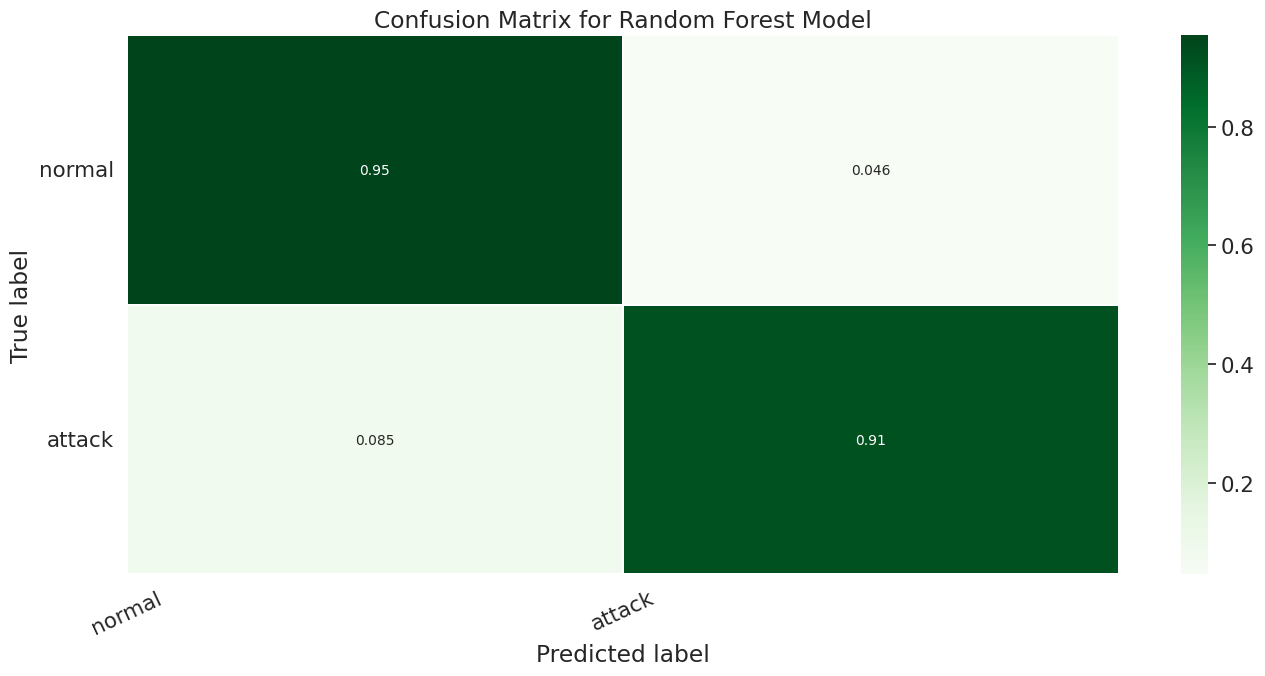

In [100]:
confusion_matrix(y_test, y_pred2)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [101]:
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1033
           1       0.88      0.86      0.87      1067

    accuracy                           0.87      2100
   macro avg       0.87      0.87      0.87      2100
weighted avg       0.87      0.87      0.87      2100



###Comparison

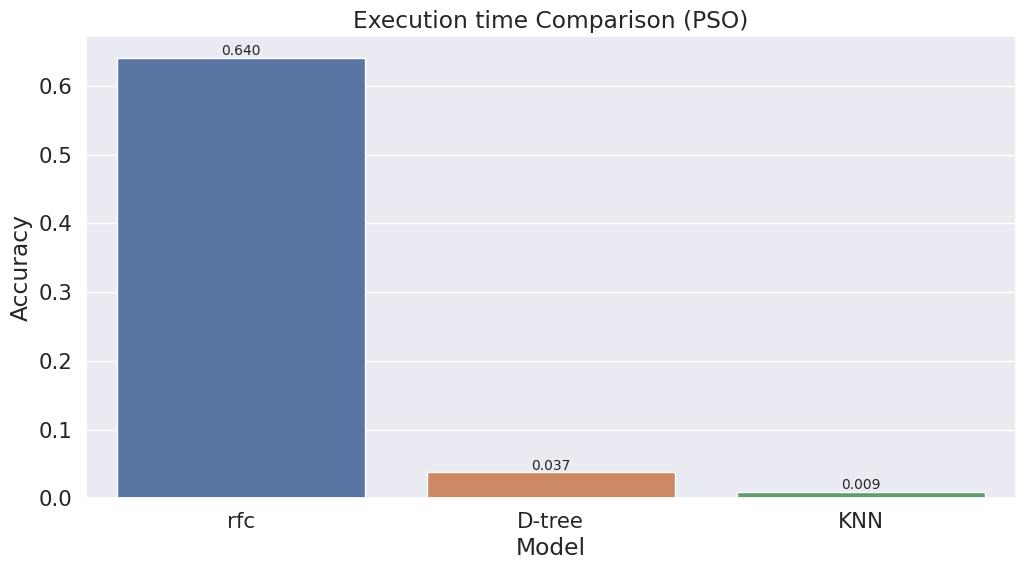

In [102]:
model_names = ['rfc', 'D-tree', 'KNN']
accuracies = [ execution_time_rfpso, execution_time_dtpso, execution_time_knnpso]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Execution time Comparison (PSO)')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()


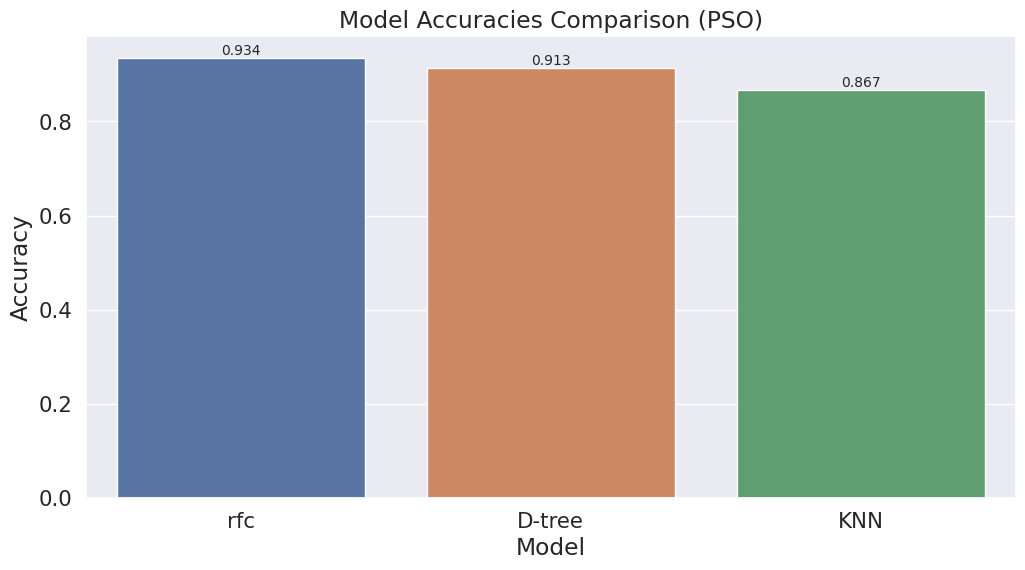

In [103]:
model_names = [ 'rfc', 'D-tree', 'KNN']
accuracies = [ accuracy_rf, accuracy_dt, accurac_knn]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison (PSO)')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()


## DragonFly Optimization

In [104]:
def objective_function_topass(model,X_train, y_train, X_valid, y_valid):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    accuracy=accuracy_score(y_valid, y_pred)  
    return accuracy

# import an algorithm !  
from zoofs import DragonFlyOptimization
# create object of algorithm
DFO=DragonFlyOptimization(objective_function_topass,n_iteration=10,method='sinusoidal',
                                    population_size=20,minimize=True)

SVMRBF = SVC()
start_time = time.time()
selected_dragon = DFO.fit(SVMRBF, X_train, y_train, X_test, y_test,verbose=True)
end_time = time.time()
execution_time_DFO = end_time - start_time
print("Time taken for training:", execution_time_DFO, "seconds")
DFO.plot_history()

 [ 2023-05-23 16:35:33,004 ] Finished iteration #0 with objective value 0.6785714285714286. Current best value is 0.6785714285714286 
 [ 2023-05-23 16:36:13,869 ] Finished iteration #1 with objective value 0.6742857142857143. Current best value is 0.6742857142857143 
 [ 2023-05-23 16:36:59,751 ] Finished iteration #2 with objective value 0.6738095238095239. Current best value is 0.6738095238095239 
 [ 2023-05-23 16:37:37,873 ] Finished iteration #3 with objective value 0.540952380952381. Current best value is 0.540952380952381 
 [ 2023-05-23 16:38:13,973 ] Finished iteration #4 with objective value 0.6738095238095239. Current best value is 0.540952380952381 
 [ 2023-05-23 16:38:50,347 ] Finished iteration #5 with objective value 0.5961904761904762. Current best value is 0.540952380952381 
 [ 2023-05-23 16:39:26,523 ] Finished iteration #6 with objective value 0.5504761904761905. Current best value is 0.540952380952381 
 [ 2023-05-23 16:40:03,049 ] Finished iteration #7 with objective v

Time taken for training: 382.06330490112305 seconds


In [105]:
selected_dragon

['proto',
 'service',
 'state',
 'sbytes',
 'sttl',
 'dloss',
 'sinpkt',
 'sjit',
 'swin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'trans_depth',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [106]:
X_train_selected = X_train[selected_dragon]
X_test_selected = X_test[selected_dragon]


### Random Forest

In [107]:
forest4 = RandomForestClassifier()
start_time = time.time()
forest4.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_rfpso = end_time - start_time
print("Time taken for training:", execution_time_rfpso, "seconds")

Time taken for training: 0.5833611488342285 seconds


In [108]:
y_pred4 = forest4.predict(X_test_selected)
accuracy_rf = accuracy_score(y_test, y_pred4)
print('Accuracy:', accuracy_rf)

Accuracy: 0.930952380952381


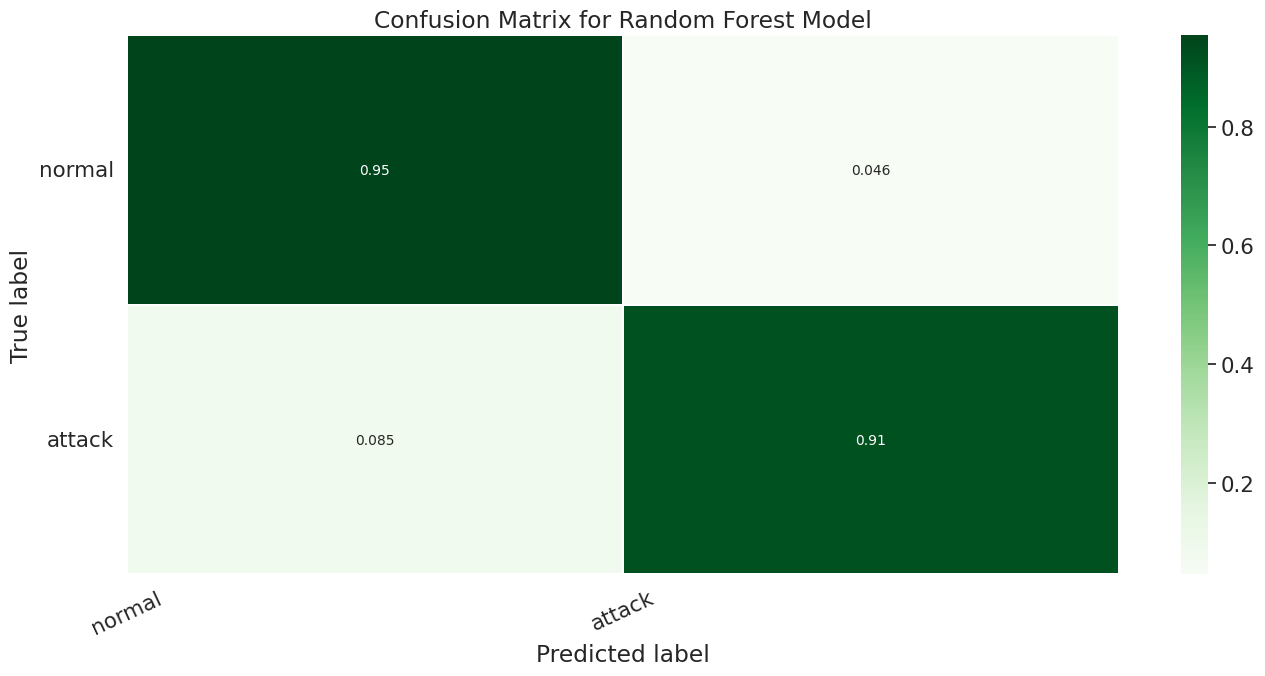

In [109]:
confusion_matrix(y_test, y_pred4)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [110]:
print(classification_report(y_test, y_pred4))


              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1033
           1       0.95      0.91      0.93      1067

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



### Descision Tree

In [111]:
d_tree4 = DecisionTreeClassifier()
start_time = time.time()
d_tree4.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_dtpso = end_time - start_time
print("Time taken for training:", execution_time_dtpso, "seconds")

Time taken for training: 0.030314922332763672 seconds


In [112]:
y_pred4 = d_tree4.predict(X_test_selected)
accuracy_dt = accuracy_score(y_test, y_pred4)
print('Accuracy:', accuracy_dt)

Accuracy: 0.9119047619047619


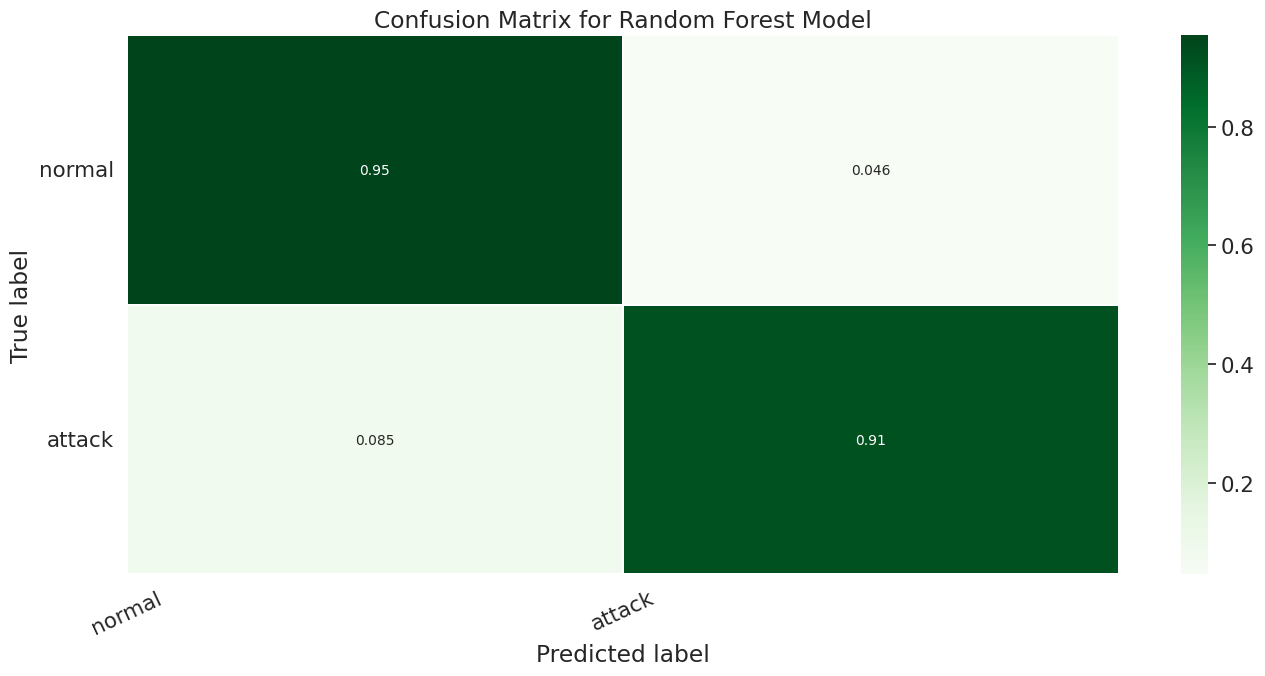

In [113]:
confusion_matrix(y_test, y_pred4)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [114]:
print(classification_report(y_test, y_pred4))


              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1033
           1       0.92      0.90      0.91      1067

    accuracy                           0.91      2100
   macro avg       0.91      0.91      0.91      2100
weighted avg       0.91      0.91      0.91      2100



###KNN part

In [115]:
KNN4 = KNeighborsClassifier()
start_time = time.time()
KNN4.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_knnpso = end_time - start_time
print("Time taken for training:", execution_time_knnpso, "seconds")

Time taken for training: 0.0061664581298828125 seconds


In [116]:
y_pred4 = KNN4.predict(X_test_selected)
accurac_knn = accuracy_score(y_test, y_pred4)

print('Accuracy:', accurac_knn)

Accuracy: 0.8585714285714285


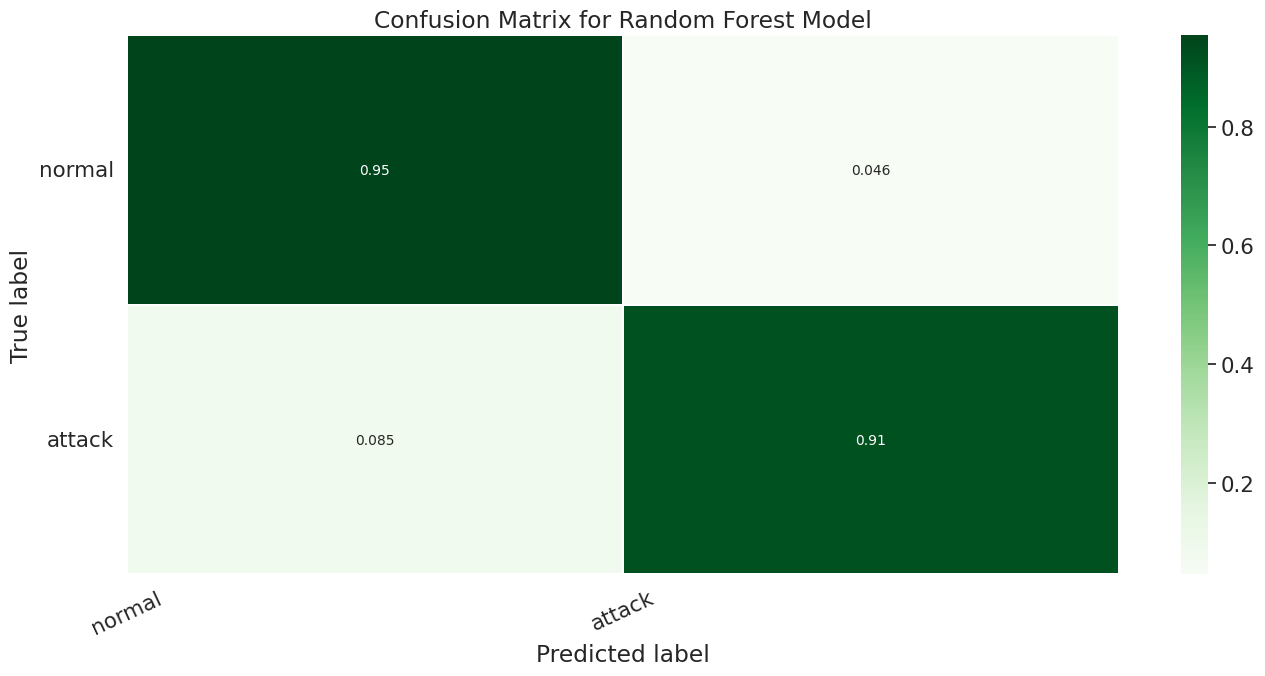

In [117]:
confusion_matrix(y_test, y_pred4)
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['normal','attack']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [118]:
print(classification_report(y_test, y_pred4))


              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1033
           1       0.87      0.85      0.86      1067

    accuracy                           0.86      2100
   macro avg       0.86      0.86      0.86      2100
weighted avg       0.86      0.86      0.86      2100



###Comparison

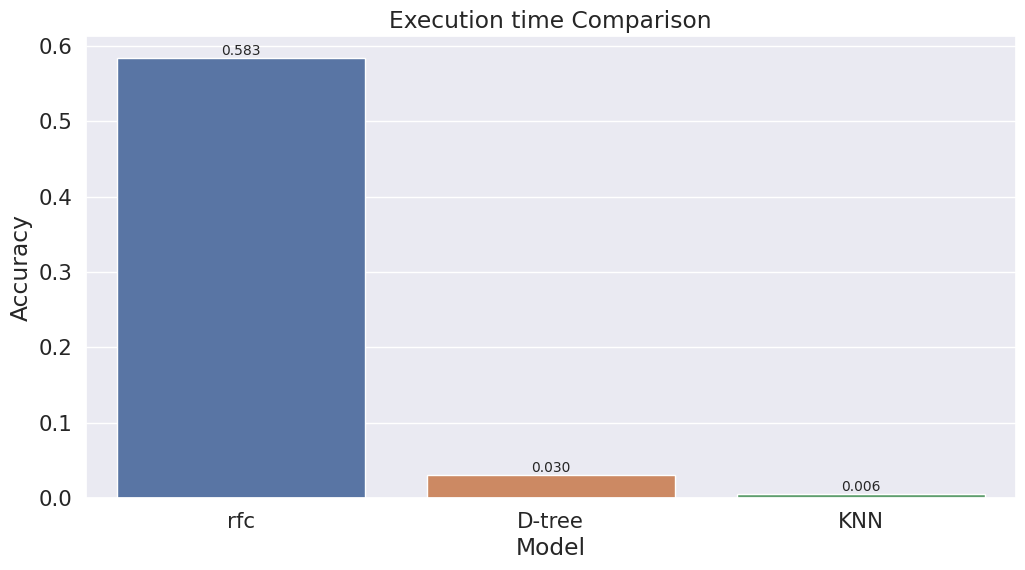

In [119]:
model_names = [ 'rfc', 'D-tree', 'KNN']
accuracies = [ execution_time_rfpso, execution_time_dtpso, execution_time_knnpso]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Execution time Comparison')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()


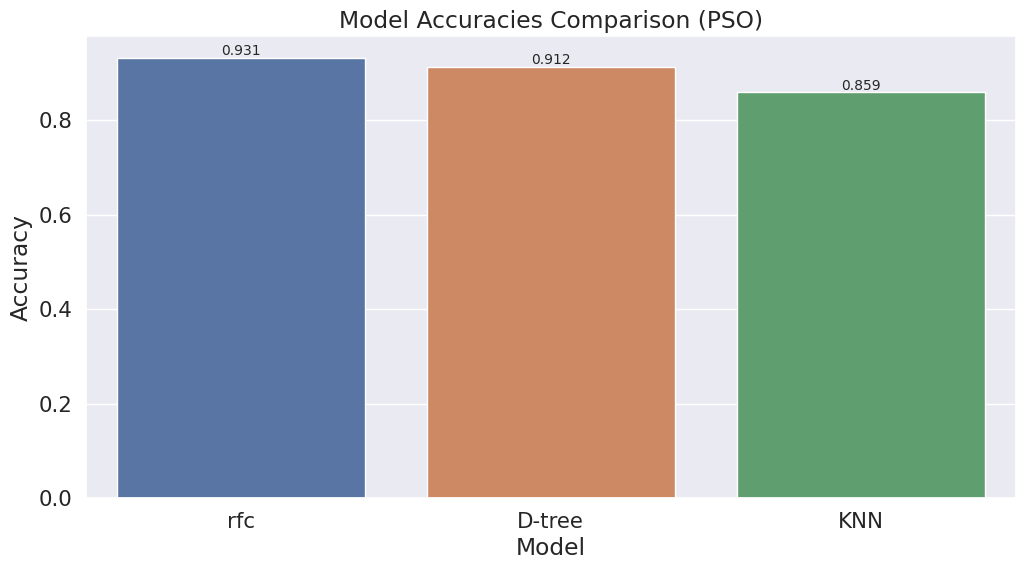

In [120]:
model_names = ['rfc', 'D-tree', 'KNN']
accuracies = [accuracy_rf, accuracy_dt, accurac_knn]

plt.figure(figsize=(12, 6))

ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison (PSO)')

for i, accuracy in enumerate(accuracies):
    ax.annotate('{:.3f}'.format(accuracy), xy=(i, accuracy), xycoords='data', ha='center', va='bottom', fontsize=10)

plt.show()
